# Cek Correlation between variable

In [1]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path='data/train.csv'
df=pd.read_csv(path, index_col=0)
df=df.drop(['epoch','sat_id'], axis=1)
df.head()

,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
id,,,,,,,,,,,,
0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [4]:
corr=df.corr()
corr

,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
x,1.000000,0.044200,-0.040504,0.001396,-0.036903,-0.001782,0.959740,0.026356,-0.044701,-0.012890,-0.032230,0.001988
y,0.044200,1.000000,0.008860,0.036210,0.001298,-0.050965,0.052310,0.960133,-0.003610,0.018663,-0.012569,-0.046751
z,-0.040504,0.008860,1.000000,0.001488,0.051661,0.001359,-0.035863,0.016587,0.958455,-0.003342,0.059060,-0.035262
Vx,0.001396,0.036210,0.001488,1.000000,0.035227,-0.026902,0.015412,0.031640,-0.002323,0.855415,0.020333,-0.069696
Vy,-0.036903,0.001298,0.051661,0.035227,1.000000,0.072648,-0.019000,0.014942,0.047309,0.037119,0.845342,0.075323
Vz,-0.001782,-0.050965,0.001359,-0.026902,0.072648,1.000000,0.003137,-0.058397,0.037476,0.019996,0.053781,0.836249
x_sim,0.959740,0.052310,-0.035863,0.015412,-0.019000,0.003137,1.000000,0.039841,-0.043283,0.001320,-0.036713,-0.001623
y_sim,0.026356,0.960133,0.016587,0.031640,0.014942,-0.058397,0.039841,1.000000,0.006284,0.036011,0.001240,-0.050834
z_sim,-0.044701,-0.003610,0.958455,-0.002323,0.047309,0.037476,-0.043283,0.006284,1.000000,0.001217,0.051292,0.001343
Vx_sim,-0.012890,0.018663,-0.003342,0.855415,0.037119,0.019996,0.001320,0.036011,0.001217,1.000000,0.034494,-0.027244


In [5]:
corr.x

x         1.000000
y         0.044200
z        -0.040504
Vx        0.001396
Vy       -0.036903
Vz       -0.001782
x_sim     0.959740
y_sim     0.026356
z_sim    -0.044701
Vx_sim   -0.012890
Vy_sim   -0.032230
Vz_sim    0.001988
Name: x, dtype: float64

In [9]:
def cek_corr_att(att, th, sample=1):
    temp=df.sample(frac=sample)
    print(len(temp))
    corr=temp.corr()
    depen_var=['x_sim','y_sim','z_sim','Vx_sim', 'Vy_sim', 'Vz_sim']
    res={}
    for i in depen_var:
        if abs(corr[att][i])>th:
            res[i]=corr[att][i]
    return res

In [10]:
for i in ['x','y','z','Vx','Vy','Vz']:
    temp=cek_corr_att(i,0.03)
    print(i, temp, temp.keys())

649912
x {'x_sim': 0.9597404725439496, 'z_sim': -0.04470080122425377, 'Vy_sim': -0.032230229676980436} dict_keys(['x_sim', 'z_sim', 'Vy_sim'])
649912
y {'x_sim': 0.05230953047131744, 'y_sim': 0.9601334055461425, 'Vz_sim': -0.04675092855625845} dict_keys(['x_sim', 'y_sim', 'Vz_sim'])
649912
z {'x_sim': -0.03586336508427698, 'z_sim': 0.9584546983347264, 'Vy_sim': 0.05906011151666738, 'Vz_sim': -0.035261567871185895} dict_keys(['x_sim', 'z_sim', 'Vy_sim', 'Vz_sim'])
649912
Vx {'y_sim': 0.031640214976846055, 'Vx_sim': 0.8554147562816091, 'Vz_sim': -0.06969579463289569} dict_keys(['y_sim', 'Vx_sim', 'Vz_sim'])
649912
Vy {'z_sim': 0.0473085876147069, 'Vx_sim': 0.0371193478194631, 'Vy_sim': 0.8453420468709871, 'Vz_sim': 0.07532277001207434} dict_keys(['z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])
649912
Vz {'y_sim': -0.05839679415508808, 'z_sim': 0.037476090111948385, 'Vy_sim': 0.053780641462551695, 'Vz_sim': 0.8362489981504302} dict_keys(['y_sim', 'z_sim', 'Vy_sim', 'Vz_sim'])


In [11]:
for i in ['x','y','z','Vx','Vy','Vz']:
    tmp=cek_corr_att(i,0.03, sample=0.3)
    print(i, tmp, tmp.keys())

194974
x {'x_sim': 0.961255231084403, 'z_sim': -0.04371171426145693, 'Vy_sim': -0.031897555493230347} dict_keys(['x_sim', 'z_sim', 'Vy_sim'])
194974
y {'x_sim': 0.05437292252614584, 'y_sim': 0.9588245936213943, 'Vz_sim': -0.04603383514017117} dict_keys(['x_sim', 'y_sim', 'Vz_sim'])
194974
z {'x_sim': -0.03727658909161251, 'z_sim': 0.9587543782421917, 'Vy_sim': 0.05995950821659454, 'Vz_sim': -0.03668938045379215} dict_keys(['x_sim', 'z_sim', 'Vy_sim', 'Vz_sim'])
194974
Vx {'y_sim': 0.03318165134687899, 'Vx_sim': 0.8554320235557469, 'Vz_sim': -0.07046681720255896} dict_keys(['y_sim', 'Vx_sim', 'Vz_sim'])
194974
Vy {'z_sim': 0.04722410164996605, 'Vx_sim': 0.04211870200170534, 'Vy_sim': 0.8445014559808338, 'Vz_sim': 0.07459295889179447} dict_keys(['z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'])
194974
Vz {'y_sim': -0.056798198592325835, 'z_sim': 0.03782173138398599, 'Vy_sim': 0.055847306964235385, 'Vz_sim': 0.8362477976662076} dict_keys(['y_sim', 'z_sim', 'Vy_sim', 'Vz_sim'])


In [12]:
list_att={'x':['x_sim', 'z_sim', 'Vy_sim'],
         'y': ['x_sim', 'y_sim', 'Vz_sim'],
         'z': ['x_sim', 'z_sim', 'Vy_sim', 'Vz_sim'],
         'Vx': ['y_sim', 'Vx_sim', 'Vz_sim'],
         'Vy': ['z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'],
         'Vz': ['y_sim', 'z_sim', 'Vy_sim', 'Vz_sim']}
list_att

{'x': ['x_sim', 'z_sim', 'Vy_sim'],
 'y': ['x_sim', 'y_sim', 'Vz_sim'],
 'z': ['x_sim', 'z_sim', 'Vy_sim', 'Vz_sim'],
 'Vx': ['y_sim', 'Vx_sim', 'Vz_sim'],
 'Vy': ['z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'],
 'Vz': ['y_sim', 'z_sim', 'Vy_sim', 'Vz_sim']}

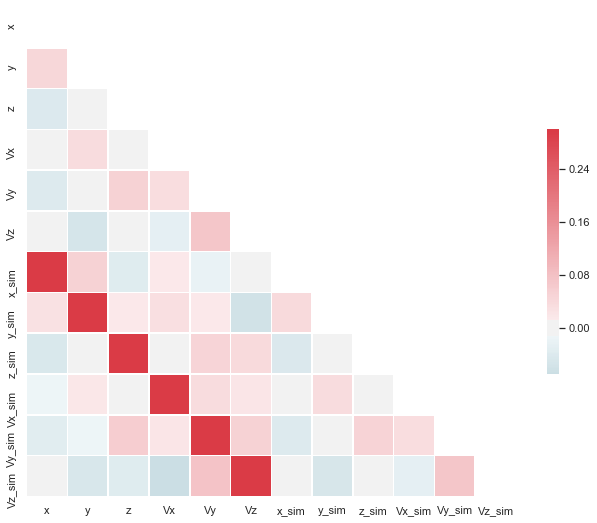

In [13]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})